# Probability calibration example

In [3]:
import sys
sys.path.append('../../../')


## Load dummy binary classification dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
# Load data
data = load_breast_cancer(as_frame=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'].map({0: 1, 1: 0}), test_size=0.33, random_state=42)

## Load dummy classifier

In [ ]:
import pandas
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Model fit
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Model predicted probabilities
no_calibrated_proba_tr = clf.predict_proba(X_train)
no_calibrated_proba_ts = clf.predict_proba(X_test)

# Get the probability of the desired class
no_calibrated_proba_tr = pandas.Series(list(zip(*no_calibrated_proba_tr))[1])
no_calibrated_proba_ts = pandas.Series(list(zip(*no_calibrated_proba_ts))[1])

## Monotonic calibrator implementation

In [ ]:
from mlcycle.evaluation.probability_calibration import Monotonic_calibrator

Train set curves


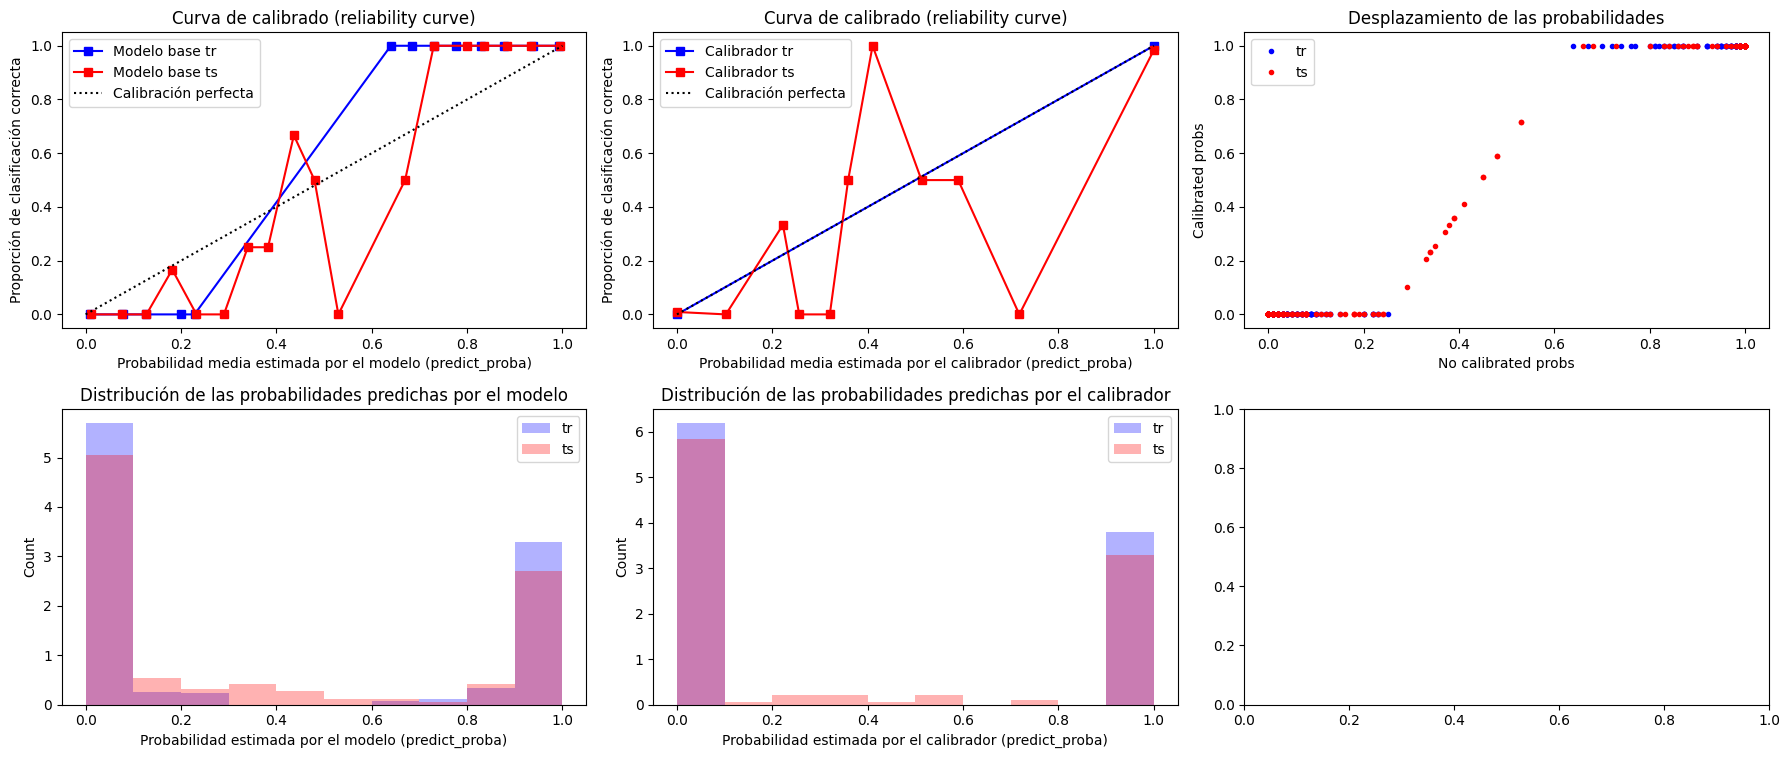

In [6]:
# Fit the calibrator
calibrator = Monotonic_calibrator()
calibrator.fit(no_calibrated_proba_tr=no_calibrated_proba_tr,
               y_tr=y_train,
               no_calibrated_proba_ts=no_calibrated_proba_ts,
               y_ts=y_test,
               plot_curves=True)

In [7]:
# Test calibrations
calibrated_proba_ts = calibrator.calibrate_proba(no_calibrated_proba_ts)

In [8]:
calibrated_proba_ts

array([0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.58974359, 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.30769231,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.     